# In this version of the notebook, I will experiment with the rules of the theory of relativity from physics for the mathematical optimization.

-------------------------------------------------------------------------------------------------------------------

### Since, as evident from the earlier notebook, the rules of Newtonian physics don't work here, I am hopeful that Einstein will help :).

import all the required stuff for this version

In [1]:
# for print function stability
from __future__ import print_function

# for numerical computations
import numpy as np 

# for gradient calculation:
import tensorflow as tf

# for plotting diagrams:
import matplotlib.pyplot as plt

# make the diagram inline in matplotlib
%matplotlib inline

In [2]:
# define the placeholder:
x = tf.placeholder(tf.float32, shape=None)

In [3]:
# define the function for optimization
y = tf.square(x) # we use the square function

In [4]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(-100, 100):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [-100, 100]

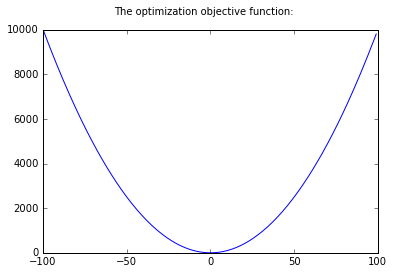

In [5]:
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(-100, 100), y_vals);

In [6]:
# define the overall structure function:
def simulate(y_value, x_value, start_position, optim_fn, no_of_iterations = 100, feed_back = False):
    '''
        This is the structural function over the total algorithm which can swap the opim_fn to create different 
        behaviour.
        
        @params
        y_value = The optimization objective function's current value
        x_value = The current parameter value
        optim_fn = The function used for optimization
        no_of_iterations = The no_of_iterations for which this simulation is to be run
        feed_back = print the values while inside the running loop
        
            @optim_fn:
                params:
                y_value = evaluated value of the simulate function's y_value
                x_value = evaluated value of the simulate function's x_value
                dy_dx = the gradient of the y wrt. x
                
                returns: The updated position
                
        @return
        final values of x_value and y_value and all the collected x_values.
    '''
    # start the TensorFlow session
    sess = tf.Session()
    
    # set the position to start position:
    position = start_position
    
    # run the simulation loop
    positions = [position] # initialize the positions list
    costs = [] # initialize the costs collecting list to empty list
    for _ in range(no_of_iterations):
        # evaluate the y_value and the dy_dx for current x_value
        cost, gradient = sess.run([y_value, tf.squeeze(tf.gradients(y_value, x_value))], 
                                                                  feed_dict={x_value: position})
        
        # print the values of cost and position:
        if(feed_back):
            print("\nCurrent position: ", position)
            print("Current cost:", cost)
        
        # update the position using the optimization function:
        position = optim_fn(cost, position, gradient)
        
        positions.append(position)
        costs.append(cost) # append the previous cost
    
    # close the session
    sess.close()
    
    # return the last position, cost and positions:
    return position, cost, positions, costs

In [7]:
# define the relative optimization function:
def relative_optmization(y_, x_, dy_dx_, epsilon = 3e-8):
    # calculate the updated x_ value and return it
    updated_x_ = x_ - (y_ / (dy_dx_ + epsilon))
    
    # return this value:
    return updated_x_

Optimised_position:  2.4134132049e-09
Final_cost:  6.79293e-18


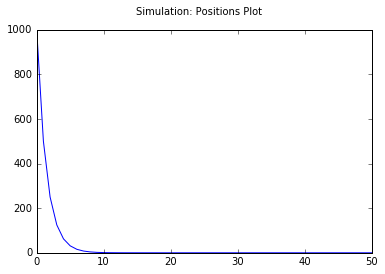

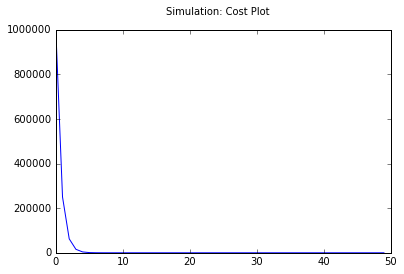

In [8]:
# run the simulation 100 times from start position 10:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, 1000, relative_optmization, no_of_iterations=50)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

### Testing the optimizer on a displaced version of the y=x^2 version

In [9]:
# change the function of y wrt x
y = tf.square(x - 100) # Now, this time, the minima is at x = 100

In [10]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(50, 150):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [50, 150]

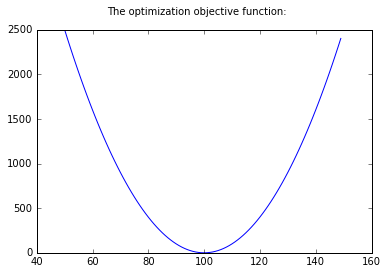

In [11]:
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(50, 150), y_vals);

Optimised_position:  100.00000021
Final_cost:  0.0


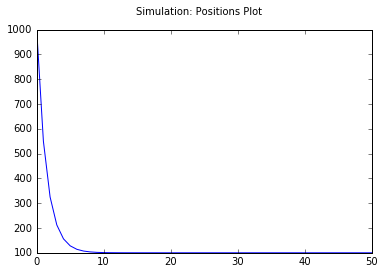

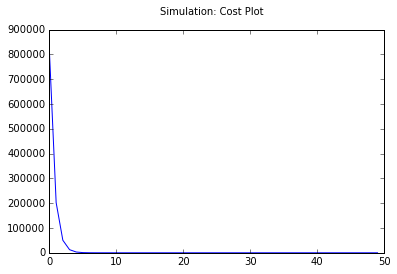

In [12]:
# Now run the simulation on this curve:
# run the simulation 100 times from start position 1000:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, 1000, 
                                               relative_optmization, no_of_iterations=50)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

Optimised_position:  99.9999964028
Final_cost:  0.0


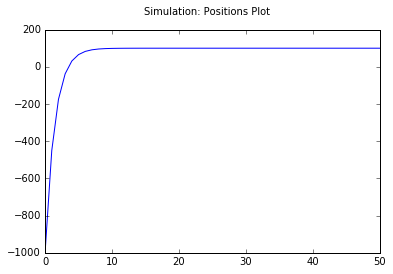

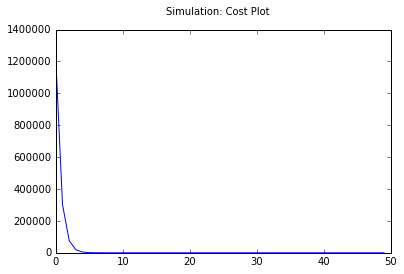

In [13]:
# Now run the simulation on this curve:
# run the simulation 100 times from start position -1000:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, -1000, 
                                               relative_optmization, no_of_iterations=50)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

### Now is the time to test this optimization equation on the most difficult curves:
## THE undeviated; THE unshaken =>  e^x

In [14]:
y = tf.exp(x)

In [15]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(-100, 100):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [-100, 100]

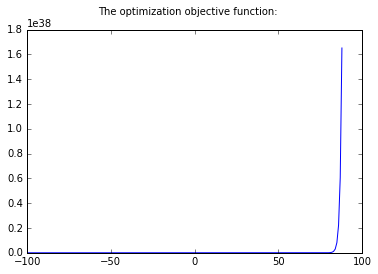

In [16]:
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(-100, 100), y_vals);

# The Moment of truth: 

Optimised_position:  -22.458791295
Final_cost:  1.77347e-10


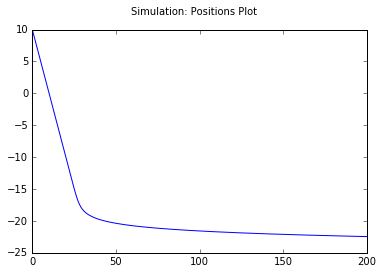

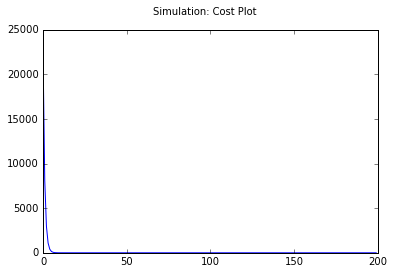

In [17]:
# Now run the simulation on this curve:
# run the simulation 100 times from start position 10:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, 10, 
                                               relative_optmization, no_of_iterations=200)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

## Equation 2: modified from newton-raphson method

In [32]:
# define the new optimization update function:
def modified_newton_raphson(y_, x_, dy_dx_):
    # calculate the updated x_ value and return it
    updated_x_ = x_ - ((y_ * dy_dx_) / (y_ + np.square(dy_dx_))) # this equation
    # looks extremely similar to the adam update. But there are a few differences
    
    # return this value:
    return updated_x_

In [33]:
# define the function for optimization
y = tf.square(x) # we use the square function

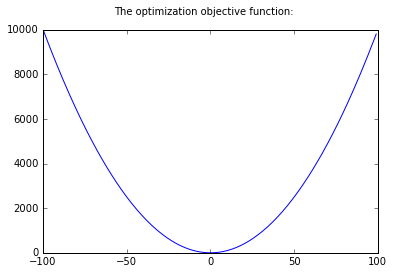

In [34]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(-100, 100):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [-100, 100]
    
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(-100, 100), y_vals);


Current position:  -1000
Current cost: 1e+06

Current position:  -600.0
Current cost: 360000.0

Current position:  -360.0
Current cost: 129600.0

Current position:  -216.0
Current cost: 46656.0

Current position:  -129.599998474
Current cost: 16796.2

Current position:  -77.7599945068
Current cost: 6046.62

Current position:  -46.65599823
Current cost: 2176.78

Current position:  -27.993598938
Current cost: 783.642

Current position:  -16.7961587906
Current cost: 282.111

Current position:  -10.0776953697
Current cost: 101.56

Current position:  -6.0466170311
Current cost: 36.5616

Current position:  -3.62797021866
Current cost: 13.1622

Current position:  -2.1767821312
Current cost: 4.73838

Current position:  -1.30606931448
Current cost: 1.70582

Current position:  -0.783641576767
Current cost: 0.614094

Current position:  -0.470184952021
Current cost: 0.221074

Current position:  -0.282110959291
Current cost: 0.0795866

Current position:  -0.169266581535
Current cost: 0.0286512

Cu

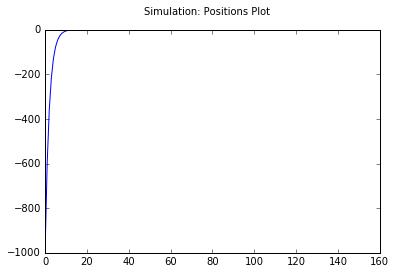

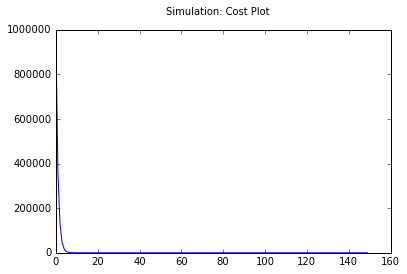

In [35]:
# Now run the simulation on this curve:
# run the simulation n times from start position 1000:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, -1000, 
                                               modified_newton_raphson, no_of_iterations=150, feed_back=True)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

In [22]:
# define the function for optimization
y = tf.exp(x) # we use the square function

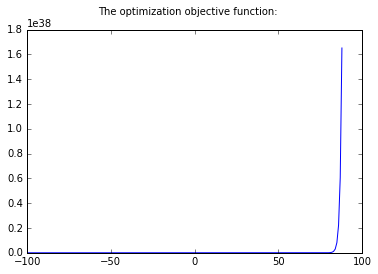

In [23]:
# plot the function:
with tf.Session() as sess:
    y_vals = [] # initialize to empty list
    for x_val in range(-100, 100):
        y_vals.append(sess.run(y, feed_dict={x: x_val}))
    # y_vals contains the y_values for the domain [-100, 100]
    
plt.figure().suptitle("The optimization objective function: ")
plt.plot(range(-100, 100), y_vals);


Current position:  10
Current cost: 22026.5

Current position:  9.00004535913
Current cost: 8103.46

Current position:  8.00016874075
Current cost: 2981.46

Current position:  7.00050395727
Current cost: 1097.19

Current position:  6.00141447783
Current cost: 404.0

Current position:  5.00388360023
Current cost: 148.991

Current position:  4.01055067778
Current cost: 55.1772

Current position:  3.02835148573
Current cost: 20.6631

Current position:  2.07451283932
Current cost: 7.96067

Current position:  1.18611168861
Current cost: 3.27432

Current position:  0.420066773891
Current cost: 1.52206

Current position:  -0.183432400227
Current cost: 0.832408

Current position:  -0.637702435255
Current cost: 0.528505

Current position:  -0.983468532562
Current cost: 0.374012

Current position:  -1.25567263365
Current cost: 0.284884

Current position:  -1.47739234567
Current cost: 0.228232

Current position:  -1.66321395338
Current cost: 0.189529

Current position:  -1.82254499197
Current co

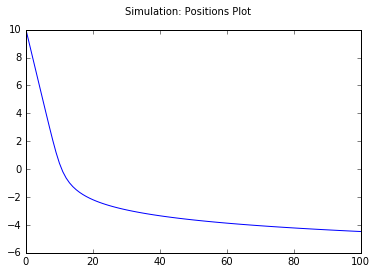

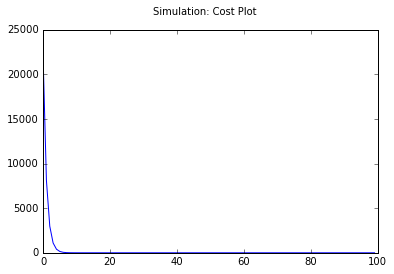

In [24]:
# Now run the simulation on this curve:
# run the simulation n times from start position 1000:
last_pos, last_cost, x_vals, y_vals = simulate(y, x, 10, 
                                               modified_newton_raphson, no_of_iterations=100, feed_back=True)

plt.figure().suptitle("Simulation: Positions Plot")
plt.plot(x_vals);

plt.figure().suptitle("Simulation: Cost Plot")
plt.plot(y_vals);

# print the final values:
print("Optimised_position: ", last_pos)
print("Final_cost: ", last_cost)

# Well, The results of this optimization technique are very good on the Synthetic functions. Let's find out in subsequent Techinques how this fares on some of the typical DL datasets. 